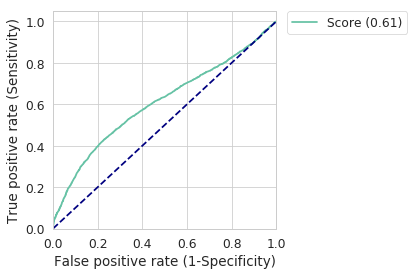

SpearmanrResult(correlation=0.29499757513785024, pvalue=3.566733572070972e-65)

In [2]:
# import pandas as pd
# import sys
# import os
# root_dir = os.path.abspath(os.path.join(os.getcwd(), "../.."))
# os.chdir(root_dir)

# import functions

#Datasets
pET = pd.read_pickle('results/pET_complete.pkl.gz', compression='infer')
ecoli_w3110 = pd.read_pickle('results/ecoli.pkl.gz', compression='infer')
pET['Accession'] = pET['Accession'].apply(lambda x:x.split('_')[0])


parsnip_pET21 = pd.read_csv('Testing_other_tools/parsnip/parsnip_pET21_NESG.txt', sep='\t', header=None)
parsnip_pET15 = pd.read_csv('Testing_other_tools/parsnip/parsnip_pET15_NESG.txt', sep='\t', header=None)
parsnip_ecoli = pd.read_csv('Testing_other_tools/parsnip/parsnip_ecoli_W3110_tags.txt', sep='\t', header=None)

#merge pET
parsnip_pET = pd.concat([parsnip_pET15, parsnip_pET21])


#Rename cols
parsnip_pET = parsnip_pET.rename(columns={0:'Accession', 1:'Score'})
parsnip_ecoli = parsnip_ecoli.rename(columns={0:'JW', 1:'Score'})

parsnip_pET.shape, pET.shape, ecoli_w3110.shape, parsnip_ecoli.shape

#merge results with cleaned dataset
df_pET = pET.merge(parsnip_pET, on="Accession")
df_ecoli = ecoli_w3110.merge(parsnip_ecoli, on="JW")


#ROC for pET

df = df_pET[['Score']].copy()

labels = df_pET['Solubility'].values
functions.make_roc(df, labels)

#Correlation for ecoli
from scipy.stats import spearmanr

spearmanr(df_ecoli['Score'], df_ecoli['Solubility(%)'])

In [3]:
df_pET.shape, df_ecoli.shape

((12215, 6), (3195, 6))

In [4]:
#cross validation sets
def compute_auc(df, labels):
    preds = df['Score'].values
    fpr, tpr, _ = functions.roc_curve(labels, preds)
    a = functions.auc(fpr, tpr)
    if a < 0.5:
        a = 1 - a
    return a


cv_10 = pd.read_pickle('results/testing_10_with_tag.pkl')
cv_40 = pd.read_pickle('results/testing_40_with_tag.pkl')
cv_90 = pd.read_pickle('results/testing_90_with_tag.pkl')




In [6]:
all_aucs_test_parsnip_10 = []
for i, v in enumerate(cv_10):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(parsnip_pET, on="Accession")
    temp = v.merge(parsnip_pET, on="Accession")[['Score']].copy()
    labels = v.merge(parsnip_pET, on="Accession")['Solubility'].values
    all_aucs_test_parsnip_10.append(compute_auc(temp, labels))
all_aucs_test_parsnip_10

[0.5482049717858777,
 0.6452396825396826,
 0.5907226802210368,
 0.5956280122660751,
 0.6156078933427511,
 0.5679625553981127,
 0.6147496433181602,
 0.6383529557758232,
 0.6234747352821665,
 0.6393517430414173]

In [7]:
functions.np.mean(all_aucs_test_parsnip_10), functions.np.std(all_aucs_test_parsnip_10)

(0.6079294872971104, 0.030436651159429146)

In [5]:
all_aucs_test_parsnip_40 = []
for i, v in enumerate(cv_40):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(parsnip_pET, on="Accession")
    temp = v.merge(parsnip_pET, on="Accession")[['Score']].copy()
    labels = v.merge(parsnip_pET, on="Accession")['Solubility'].values
    all_aucs_test_parsnip_40.append(compute_auc(temp, labels))
all_aucs_test_parsnip_40

[0.5953394283312317,
 0.6207144988066826,
 0.615638554506789,
 0.5871364626752558,
 0.6187509375937594,
 0.6357493778701352,
 0.5778233576111589,
 0.6071188321470051,
 0.5903454843128737,
 0.6320224002042184]

In [4]:
functions.np.mean(all_aucs_test_parsnip_40), functions.np.std(all_aucs_test_parsnip_40)

(0.6080639334059109, 0.018711806044387203)

In [5]:
all_aucs_test_parsnip_90 = []
for i, v in enumerate(cv_90):
    v['Accession'] = v.Accession.apply(lambda x:x.split('_')[0])
    v.merge(parsnip_pET, on="Accession")
    temp = v.merge(parsnip_pET, on="Accession")[['Score']].copy()
    labels = v.merge(parsnip_pET, on="Accession")['Solubility'].values
    all_aucs_test_parsnip_90.append(compute_auc(temp, labels))
all_aucs_test_parsnip_90

[0.6030736371476697,
 0.6096486645936013,
 0.6233782361542737,
 0.6226521721260942,
 0.6094803605207522,
 0.6100417163289631,
 0.594447964991152,
 0.563556366697699,
 0.6449360851246162,
 0.5946017418844022]

In [6]:
functions.np.mean(all_aucs_test_parsnip_90), functions.np.std(all_aucs_test_parsnip_90)

(0.6075816945569222, 0.020458386100526367)